# Linear Regression, Price Optimisation & Price Elasticity of Demand

**Dataset:** `price_data.csv` (columns: `Price`, `Quantity`)  

## Objectives (from the brief)
- **Define Linear Regression** and provide concise notes.
- **Price optimisation using Linear Regression.**
- **Explain Price Elasticity of Demand (PED).**
- **Use the provided dataset to estimate PED**

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.api import jarque_bera

warnings.filterwarnings('ignore')

# Set global plotting parameters
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True

### importing `price_data.csv`

In [2]:
data=pd.read_csv(Path("price_data.csv"))

## 1. Linear Regression - Definition & Notes

**Definition.** Linear regression models the relationship between a **response** (dependent) variable \(y\) and one or more **predictors** (independent variables) \(x\).  
For a simple (one-variable) model:

## 2. Price Elasticity of Demand (PED) - Concept

**Definition.** PED measures how **responsive** quantity demanded is to a change in price:


$$PED = \frac{\% \text{ change in quantity demanded}}{\% \text{ change in price}}$$


- If `( PED > 1)`: **elastic** - quantity is very responsive to price; lowering price tends to raise revenue.
- If `( PED < 1)`: **inelastic** - quantity is less responsive; raising price tends to raise revenue.
- If `( PED = 1)`: **unit elastic** - revenue roughly unchanged for small price moves.

**Estimating PED from regression.**  
Two common approaches:

1. **Linear-level demand:** `Q = a + bP`. The local (point) elasticity at ((P, Q)) is  

    $$PED(P, Q) = b \times \frac{P}{Q}$$

2. **Log-log (constant elasticity) demand:** ($$ln Q = alpha + e ln P$$). The coefficient \(e\) **is the elasticity** everywhere in the sample.

### EDA

In [3]:
data.describe()

,Price,Quantity
count,1000.000000,1000.000000
mean,192.404000,1611.900000
std,84.275947,2534.252992
min,15.000000,60.000000
25%,145.000000,300.000000
50%,187.000000,700.000000
75%,216.000000,1907.500000
max,1008.000000,23150.000000


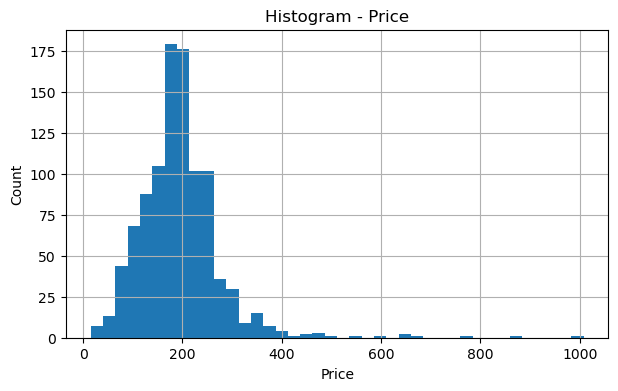

In [4]:
# Histogram: Price
plt.figure()
plt.hist(data['Price'].dropna(), bins=40)
plt.title("Histogram - Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

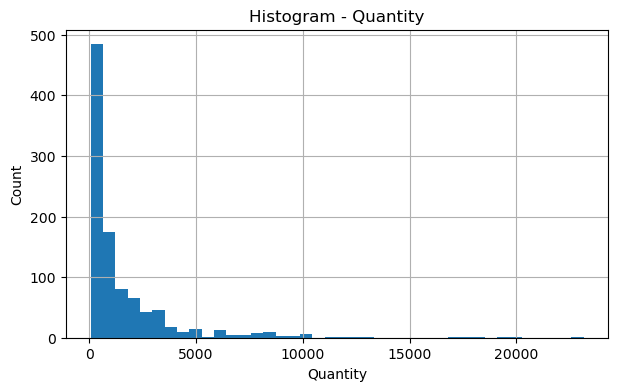

In [5]:
# Histogram: Quantity
plt.figure()
plt.hist(data['Quantity'].dropna(), bins=40)
plt.title("Histogram - Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

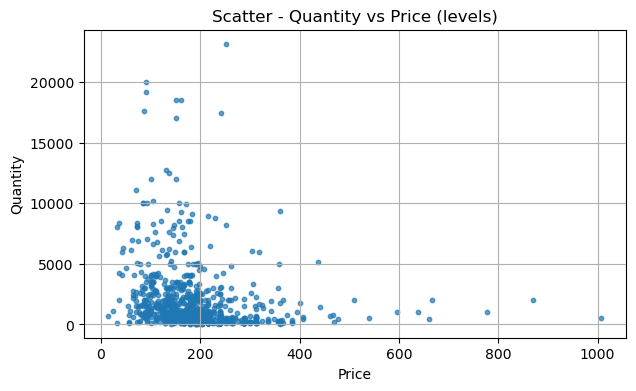

In [6]:
# Scatter (levels)
plt.figure()
plt.scatter(data['Price'], data['Quantity'], s=10, alpha=0.7)
plt.title('Scatter - Quantity vs Price (levels)')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


In [7]:
corr = data[['Price','Quantity']].corr()
print("Correlation matrix:\n", corr)

Correlation matrix:
              Price  Quantity
Price     1.000000 -0.220775
Quantity -0.220775  1.000000


### Data Normalization

In [8]:
# Ensure strictly positive before log
mask_pos = (data['Price']>0) & (data['Quantity']>0)
data_log = data.loc[mask_pos, ['Price','Quantity']].copy()
data_log['lnPrice'] = np.log(data_log['Price'])
data_log['lnQty'] = np.log(data_log['Quantity'])

print(data_log[['Price','Quantity','lnPrice','lnQty']].head())
print("\nDescribe (logged):\n", data_log[['lnPrice','lnQty']].describe())

   Price  Quantity   lnPrice     lnQty
0    192        80  5.257495  4.382027
1    145       960  4.976734  6.866933
2    240       200  5.480639  5.298317
3    240       150  5.480639  5.010635
4    375       740  5.926926  6.606650

Describe (logged):
            lnPrice        lnQty
count  1000.000000  1000.000000
mean      5.175310     6.607967
std       0.422819     1.240376
min       2.708050     4.094345
25%       4.976734     5.703782
50%       5.231109     6.551080
75%       5.375278     7.553526
max       6.915723    10.049750


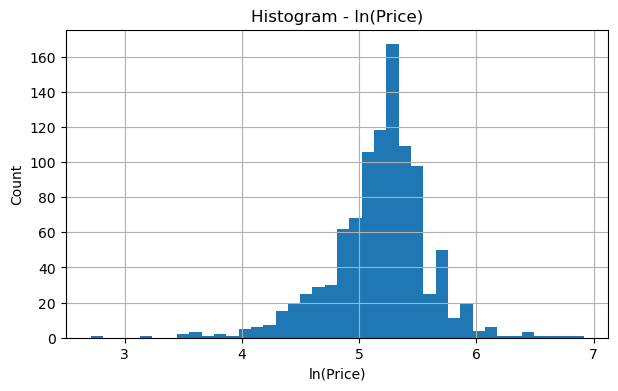

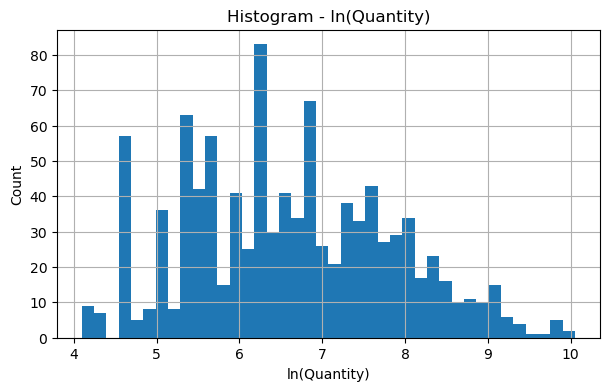

In [9]:
# Histograms on the log scale
plt.figure()
plt.hist(data_log['lnPrice'], bins=40)
plt.title("Histogram - ln(Price)")
plt.xlabel("ln(Price)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(data_log['lnQty'], bins=40)
plt.title("Histogram - ln(Quantity)")
plt.xlabel("ln(Quantity)")
plt.ylabel("Count")
plt.show()


## 3. Simple linear demand model: `Quantity ~ Price`

We fit `(Q = a + bP)`, report diagnostics, and compute **point elasticity at the sample means**  
$$
\mathrm{PED}_{\bar P,\bar Q}
\;=\;
\hat b \cdot \frac{\bar P}{\bar Q}
$$


In [10]:
lin_mod = smf.ols('Quantity ~ Price', data=data_log).fit()
print(lin_mod.summary())

a = float(lin_mod.params['Intercept'])
b = float(lin_mod.params['Price'])
P_bar = data_log['Price'].mean()
Q_bar = data_log['Quantity'].mean()
ped_at_mean = b * (P_bar / Q_bar)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.66e-12
Time:                        15:51:32   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2889.2504    194.994     14.817      0.0

## Interpretation - Linear demand model

**Estimated demand equation (from OLS).**
$$
\widehat{Q} = 2889.25 + (-6.6389)\,P
$$

**Slope (price effect).**
$$
\hat{\beta}_1 = -6.6389 ;\; t=-7.151 ;\; p<0.001 ;\; 95\%~CI=[-8.461,-4.817]
$$
*A 1-unit increase in price is associated with about 6.64 fewer units demanded (downward-sloping demand).*

**Intercept.**
$$
\hat{\beta}_0 = 2889.25 ;\; t=14.817 ;\; p<0.001
$$
*Predicted quantity when $P=0$; interpret cautiously if $P=0$ lies outside the observed range.*

**Goodness of fit.**
$$
R^2 = 0.049 ;\; \text{Adj. }R^2 = 0.048
$$
*Price alone explains about 4.9% of the variation in quantity.*

**Overall model test.**
$$
F(1,998) = 51.14 ;\; p<0.001
$$
*The model with Price fits significantly better than a no-predictor model.*


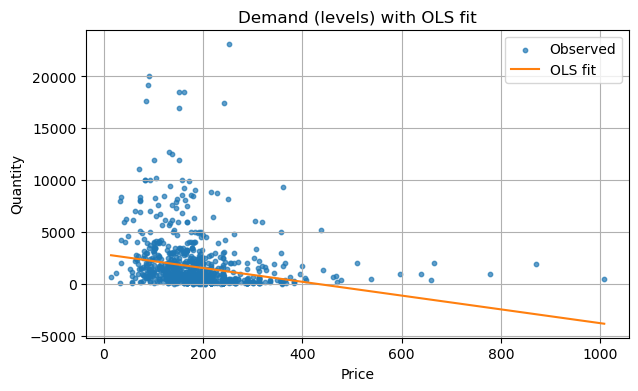

In [11]:
# Visual: levels with fitted line
plt.figure()
plt.scatter(data_log['Price'], data_log['Quantity'], s=10, alpha=0.7, label='Observed')
x = np.linspace(data_log['Price'].min(), data_log['Price'].max(), 100)
y_hat = a + b * x
plt.plot(x, y_hat, color='tab:orange', label='OLS fit')
plt.title('Demand (levels) with OLS fit')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [13]:
print(f'Intercept (a) = {a:.4f}')
print(f'Slope (b)     = {b:.4f}')
print(f'R^2           = {lin_mod.rsquared:.4f}')
print(f'PED at means  = {ped_at_mean:.4f}')


Intercept (a) = 2889.2504
Slope (b)     = -6.6389
R^2           = 0.0487
PED at means  = -0.7925


## 4. Price optimization (linear demand)

Use the fitted demand curve $Q = a + bP$ to identify revenue and profit maximizing prices. The unit cost can be adjusted as needed.

In [ ]:
cost_per_unit = 40.0

price_grid = np.linspace(float(data_log['Price'].min()), float(data_log['Price'].max()), 400)
pred_qty = lin_mod.predict(pd.DataFrame({'Price': price_grid}))
pred_qty = np.maximum(pred_qty.to_numpy(), 0.0)

revenue = price_grid * pred_qty
profit = (price_grid - cost_per_unit) * pred_qty

rev_idx = int(revenue.argmax())
prof_idx = int(profit.argmax())

rev_opt_price = float(price_grid[rev_idx])
rev_opt_qty = float(pred_qty[rev_idx])
rev_opt_revenue = float(revenue[rev_idx])
rev_opt_profit = float((rev_opt_price - cost_per_unit) * rev_opt_qty)

profit_opt_price = float(price_grid[prof_idx])
profit_opt_qty = float(pred_qty[prof_idx])
profit_opt_revenue = float(revenue[prof_idx])
profit_opt_profit = float(profit[prof_idx])

opt_summary = pd.DataFrame([
    {
        'Scenario': 'Revenue max',
        'Price': rev_opt_price,
        'Quantity': rev_opt_qty,
        'Revenue': rev_opt_revenue,
        'Profit': rev_opt_profit,
    },
    {
        'Scenario': f'Profit max (cost={cost_per_unit:.2f})',
        'Price': profit_opt_price,
        'Quantity': profit_opt_qty,
        'Revenue': profit_opt_revenue,
        'Profit': profit_opt_profit,
    }
])

opt_summary.round(2)


,Scenario,Price,Quantity,Revenue,Profit
0,Revenue max,216.59,1451.36,314343.87,256289.67
1,Profit max (cost=40.00),236.50,1319.18,311980.20,259213.15


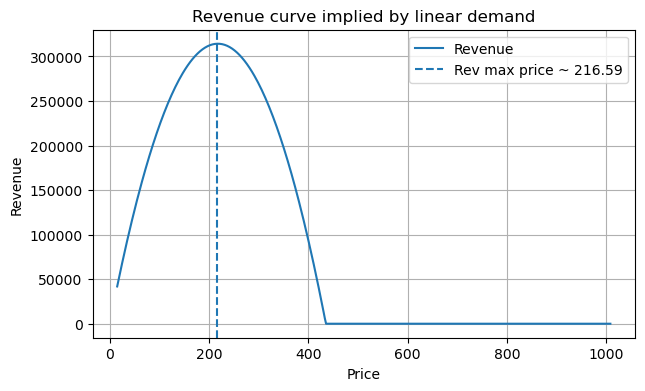

In [15]:
plt.figure()
plt.plot(price_grid, revenue, label='Revenue', color='tab:blue')
plt.axvline(rev_opt_price, color='tab:blue', linestyle='--', label=f'Rev max price ~ {rev_opt_price:.2f}')
plt.title('Revenue curve implied by linear demand')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.legend()
plt.show()


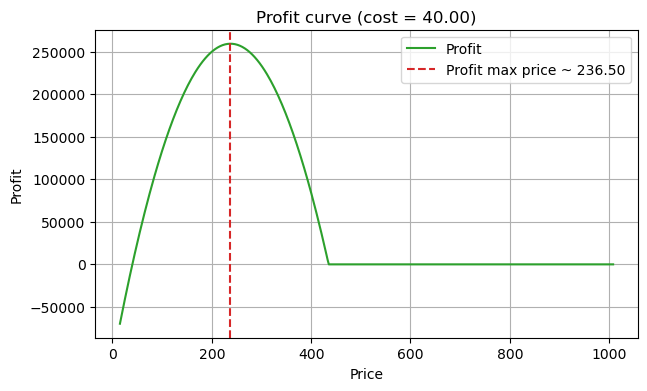

In [16]:
plt.figure()
plt.plot(price_grid, profit, label='Profit', color='tab:green')
plt.axvline(profit_opt_price, color='tab:red', linestyle='--', label=f'Profit max price ~ {profit_opt_price:.2f}')
plt.title(f'Profit curve (cost = {cost_per_unit:.2f})')
plt.xlabel('Price')
plt.ylabel('Profit')
plt.legend()
plt.show()
